<a href="https://colab.research.google.com/github/PavelNovikov888/SciPy/blob/master/SciPy__%D0%A2%D0%B5%D1%81%D1%82%D1%8B_%D0%BD%D0%B0_%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%B5_%D0%B4%D0%BE%D0%BB%D0%B8_%D0%BD%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D1%81%D1%82%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy import stats

# НАЧНЁМ С ОДНОВЫБОРОЧНЫХ ТЕСТОВ

Помним, что данные должны приходить из нормального распределения.   
Сгенерируем множество точек из нормального распределения (для воспроизводимости зафиксируем random state) со средним, равным 5, и стандартным отклонением, равным 2.

In [ ]:
np.random.seed(13)
random_normal = np.random.normal(5, 2, 100)
random_bin = np.random.choice([0, 1], size=(100,), p=[0.8, 0.2])

In [ ]:
random_normal[:20]

array([3.57521868, 6.50753276, 4.91099384, 5.90362468, 7.69020342,
       6.06467578, 7.7003758 , 6.72242275, 7.95737147, 2.90924574,
       3.42202195, 2.47678811, 6.12569357, 4.5133475 , 6.82748141,
       5.63470185, 5.25460656, 9.30076593, 6.21257731, 4.9464567 ])

In [ ]:
random_bin[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1])

Проверим гипотезу, что среднее выборки, сгенерированной из нормального распределения, равно 0:

In [ ]:
stats.ttest_1samp(random_normal, 0.0)

TtestResult(statistic=27.315846581411247, pvalue=6.762242033211871e-48, df=99)

По результату мы видим, что p_value= 6.762242033211871e-48, соответственно, гипотеза о равенстве среднего нулю отвергается на уровне значимости 0.01 (вообще говоря, почти на любом уровне значимости).  
Теперь проверим против 5.0

In [ ]:
stats.ttest_1samp(random_normal, 5.0)

TtestResult(statistic=0.6236095710595042, pvalue=0.5343182132984923, df=99)

Мы видим, что гипотеза о равенстве 5 принимается с p_value=0.53.  
Проведём тест на равенство доли единиц во второй выборке 0.5

In [ ]:
stats.binom_test(x=[sum(random_bin), len(random_bin) - sum(random_bin)], p=0.5)

<ipython-input-31-634c4775c427>:1: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  stats.binom_test(x=[sum(random_bin), len(random_bin) - sum(random_bin)], p=0.5)


1.1159089057251951e-09

Заметим, что x = [число позитивных действий, число фейлов]. Видим, что гипотеза отвергается практически на любом уровне значимости с p_value=1.115908905725195e-09.

In [ ]:
stats.binom_test(x=[sum(random_bin), len(random_bin) - sum(random_bin)], p=0.2)

<ipython-input-32-7c390d65063e>:1: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  stats.binom_test(x=[sum(random_bin), len(random_bin) - sum(random_bin)], p=0.2)


1.0

Гипотеза не отвергается.

# А ТЕПЕРЬ — ДВУХВЫБОРОЧНЫЙ ТЕСТ!

Мы увидели, что проводить статистический тест со SciPy просто!  
Давайте теперь проделаем то же самое со множественной проверкой гипотез.

Сгенерируем множества точек:

In [ ]:
random_normal_5 = np.random.normal(5, 2, 100)
random_normal_false = np.random.normal(7, 2, 100)
print(random_normal_5[:20])
print(random_normal_false[:20])

[3.84431669 3.31665693 3.89319476 4.51698938 6.52446165 4.49496482
 5.58328102 4.22068895 5.9503754  4.85527368 7.5381162  5.51449801
 1.67148713 4.75650713 4.11697554 6.91049338 5.03994184 6.72563379
 6.48709049 3.67483767]
[ 6.67745209  7.89903303  2.34614758  6.16837727 12.18416813  7.74953623
  8.99904773  7.67824334  6.30156172  8.68768411  8.48380136  6.29600636
  6.61900843  8.34454424  5.4006256   5.31061511  9.34455485  9.29812638
  6.61239016 10.13328045]


Проверим двухвыборочными тестами:

In [ ]:
print(stats.ttest_ind(random_normal_5, random_normal))
print(stats.ttest_ind(random_normal_false, random_normal))

TtestResult(statistic=-1.109776693013421, pvalue=0.2684412714449198, df=198.0)
TtestResult(statistic=7.56418694452888, pvalue=1.4333446457467145e-12, df=198.0)


Видим, что в первом случае нулевая гипотеза не отвергается, а во втором — отвергается.

# ТЕСТ НА РАВЕНСТВО ДОЛЕЙ
 Тест на равенство пропорций (долей) в SciPy не реализован, поэтому придётся обратиться к другому пакету — statsmodels.

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

И снова сгенерируем бинарные выборки:

In [ ]:
random_bin_2 = np.random.choice([0, 1], size=(100,), p=[0.8, 0.2])
random_bin_false = np.random.choice([0, 1], size=(100,), p=[0.6, 0.4])

Посмотрим на результат применения теста:

In [ ]:
print(proportions_ztest(count=[sum(random_bin), sum(random_bin_2)], nobs=[len(random_bin), len(random_bin_2)]))
print(proportions_ztest(count=[sum(random_bin), sum(random_bin_false)], nobs=[len(random_bin), len(random_bin_false)]))

(-0.5163595320566151, 0.6056033242983083)
(-2.5197631533948477, 0.011743382301172597)


Первое число — значение статистики, второе — p_value. Видим, что результаты совпадают с ожидаемыми.



Обратим внимание, что в сам тест мы передаём не выборки, а только число положительных событий и общее число событий.

**Задание:** Какое значение p_value * 10**7 получается при проведении теста равенства доли 0.1 по выборке, сгенерированной кодом ниже (округлите до двух знаков после запятой)?

In [ ]:
np.random.seed(13)
random_bin = np.random.choice([0, 1], size=(100,), p=[0.7, 0.3])

In [ ]:
stats.binom_test(x=[sum(random_bin), len(random_bin) - sum(random_bin)], p=0.1)

<ipython-input-39-549470061014>:1: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  stats.binom_test(x=[sum(random_bin), len(random_bin) - sum(random_bin)], p=0.1)


3.481426687624852e-07

**Задание:**
Какое значение статистики получается при проведении теста равенства средних 3 по выборке, сгенерированной кодом ниже (округлите до двух знаков после запятой)?

In [ ]:
np.random.seed(21)
random_normal = np.random.normal(18, 20, 100)

stats.ttest_1samp(random_normal, 3.0)

TtestResult(statistic=7.974042103707906, pvalue=2.7279794218267574e-12, df=99)

**Задание:**
На каких уровнях значимости отвергается гипотеза равенства среднего 7 по выборке, сгенерированной кодом ниже:

In [ ]:
np.random.seed(21)
random_normal = np.random.normal(18, 20, 10)
stats.ttest_1samp(random_normal, 7.0)

TtestResult(statistic=1.6748822466424405, pvalue=0.12827924668031368, df=9)

# ТЕСТЫ НА НОРМАЛЬНОСТЬ

In [ ]:
import numpy as np
from scipy import stats

In [ ]:
np.random.seed(13)
random_normal = np.random.normal(5, 2, 100)
random_uniform = np.random.uniform(0, 1, 100)

Проведём тест на нормальность сгенерированных распределений:

In [ ]:
# критерий Шапиро-Уилка
print(stats.shapiro(random_normal))
print(stats.shapiro(random_uniform))

ShapiroResult(statistic=0.9897642135620117, pvalue=0.6455513834953308)
ShapiroResult(statistic=0.9223212599754333, pvalue=1.8729009752860293e-05)


В первом случае распределение нормальное.   

Во втором случае нулевая гипотеза (нормальность распределения, из которого приходят точки) отвергается практически на любом уровне значимости.

Для теста Колмогорова-Смирнова необходимо передавать распределение, относительно которого происходит сравнение.


In [ ]:
print(stats.kstest(random_normal, 'norm'))
print(stats.kstest(random_uniform, 'norm'))

KstestResult(statistic=0.933371471007256, pvalue=4.646377515900965e-118, statistic_location=2.476788109361862, statistic_sign=-1)
KstestResult(statistic=0.5039276991503323, pvalue=4.926235881910341e-24, statistic_location=0.00984544079968852, statistic_sign=-1)


Мы видим, что в обоих случаях гипотеза о нормальности распределения отвергается.  

Почему? Потому что происходит сравнение с нормальным распределением со средним 0 и дисперсией 1.   

Проверим это, нормализовав входное множество точек.

In [ ]:
print(stats.kstest((random_normal - np.mean(random_normal)) / np.std(random_normal), 'norm'))

KstestResult(statistic=0.06562034353090856, pvalue=0.7572142037683822, statistic_location=-0.40053934145643744, statistic_sign=1)


Задание:
Чему равно p_value проверки на нормальность данных, сгенерированных следующим образом, тестом Шапиро-Уилка? Ответ округлите до второго знака после запятой.



In [ ]:
np.random.seed(2)
random_normal = np.random.normal(2, 4, 10)

print(stats.shapiro(random_normal))

ShapiroResult(statistic=0.9548439383506775, pvalue=0.7258638739585876)


Задание: Чему равно p_value проверки на нормальность данных, сгенерированных следующим образом, тестом Колмогорова-Смирнова без нормализации? Ответ округлите до второго знака после запятой.

In [ ]:
np.random.seed(2)
random_normal = np.random.normal(2, 4, 10)

print(stats.kstest(random_normal, 'norm'))

KstestResult(statistic=0.514185695796664, pvalue=0.005575825333255893, statistic_location=-1.366989462624816, statistic_sign=1)


Задание:
Чему равно p_value проверки на нормальность данных, сгенерированных следующим образом, тестом Колмогорова-Смирнова с нормализацией? Ответ округлите до второго знака после запятой.

In [ ]:
np.random.seed(2)
random_normal = np.random.normal(2, 4, 10)

print(stats.kstest((random_normal - np.mean(random_normal)) / np.std(random_normal), 'norm'))

KstestResult(statistic=0.17907654022324243, pvalue=0.8514658527102467, statistic_location=-0.19953160960160207, statistic_sign=1)


# Множественная проверка гипотез. Практика

Как всегда, сначала импортируем все необходимые библиотеки.

В этот раз SciPy нас подвёла: на данный момент в ней нет необходимой функциональности, но не напомнить про множественную проверку гипотез в рамках статистических тестов мы не могли. Поэтому воспользуемся библиотекой statsmodels.

In [55]:
import numpy as np
from statsmodels.stats.multitest import multipletests

Сгенерируем p-values и предположим, что мы их получили из множественной проверки гипотез.

In [56]:
np.random.seed(2)
pvals = np.random.uniform(0, 0.3, 100)

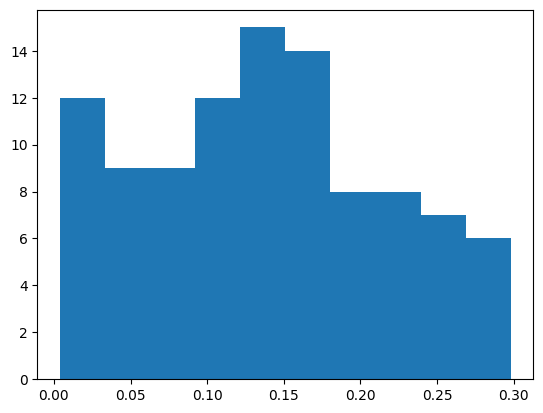

In [60]:
import matplotlib.pyplot as plt
plt.hist(pvals)
plt.show()

Скорректируем поправкой Холма:

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


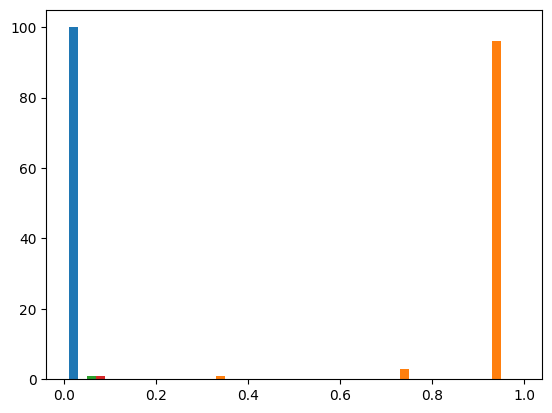

In [62]:
pvals_corrected = multipletests(pvals, method="holm")
plt.hist(pvals_corrected)
plt.show()

Посмотрим на результат: поправка сильно сдвинула среднее значения p_values.

# Статистические тесты и бизнес-интерпретация результатов. Практика

Попробуем применить статистические тесты на практике.   
И сделаем мы это на известном датасете «Титаника»: напомним, что в нём содержатся данные о выживших пассажирах.   
В центре нашего внимания окажутся некоторые статистически подтверждённые закономерности.
Датасет уже разбит на тренировочную и тестовую выборки.
Итак, импортируем нужные библиотеки и рассмотрим датасет подробнее.

In [63]:
import numpy as np
import pandas as pd
import scipy as sp
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multitest import multipletests

In [64]:
#В колабе импортируем все необходимые библиотеки
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Привязываем гуглдиск к колабу
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Загружаем файл в колаб
download = drive.CreateFile({"id": "12bUWnAgj9d7eSFWwS7koa5vwciKvo029"})
# https://drive.google.com/file/d/12bUWnAgj9d7eSFWwS7koa5vwciKvo029/view?usp=sharing
download.GetContentFile("train.csv")

download = drive.CreateFile({"id": "1W6rLBGbPG-gs5mB0CWvH0tbSCfV-M3s-"})
# https://drive.google.com/file/d/1W6rLBGbPG-gs5mB0CWvH0tbSCfV-M3s-/view?usp=sharing
download.GetContentFile("test.csv")

In [65]:
df_train = pd.read_csv("train.csv", index_col="PassengerId")
df_test = pd.read_csv("test.csv", index_col="PassengerId")

## ИССЛЕДУЕМ СТРУКТУРУ НАШИХ ДАННЫХ

In [66]:
print(df_train.info())
print(df_train.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min     

## ОТВЕТИМ НА ВОПРОСЫ С ТОЧКИ ЗРЕНИЯ СТАТИСТИКИ

а) Правда ли, что мужчины реже выживали, чем женщины?

Если мы построим графики, то это будет очевидно, но верить своим глазам стоит не всегда. Лучше протестируем!

In [67]:
# количество выживших мужчин
male_survived = df_train[df_train['Sex']=='male']['Survived'].sum()
# общее количество мужчин
male_num = len(df_train[df_train['Sex']=='male']['Survived'])
# количество выживших женщин
female_survived = df_train[df_train['Sex']=='female']['Survived'].sum()
# общее количество женщин
female_num = len(df_train[df_train['Sex']=='female']['Survived'])
# z-тест на пропорции
proportions_ztest(count=[male_survived, female_survived], nobs=[male_num , female_num])

(-16.218833930670097, 3.7117477701134797e-59)

p_value = 3.71e-59 < 0.05 значит НО: отвегается (пропорции выживших не равны)

In [88]:
male_survived

109

In [90]:
len(df_train[df_train['Sex']=='male']['Survived'])

577

In [94]:
female_survived

233

In [95]:
female_num

314

Мы видим, что есть статистически значимое различие между числом выживших мужчин и женщин. Но наша цель не в том, чтобы зафиксировать наличие различий в уровне выживаемости, а выяснить, выживали ли мужчины реже. У нас есть два варианта: просто посмотреть, где больше выживших с учётом проверенной гипотезы, или провести одностороннюю проверку гипотезы. Последний вариант вполне подходит:

In [93]:
# проверяем гипотезу о пропорциях выживших,выживали ли мужчины реже, чем женщины
# smaller означает что альтернативная гипотеза, что первая группа(male_survived) выживали реже(эта доля smaller), чем вторая(female_survived)
proportions_ztest(count=[male_survived, female_survived], nobs=[male_num , female_num], alternative='smaller')

(-16.218833930670097, 1.8558738850567398e-59)

p_value = 3.71e-59 < 0.05 значит НО отвергается и принимается НА (пропорции выживших не равны, доля первой группы(male) меньше) Мужчины выживали реже.

b) Верно ли, что погибшие в среднем были старше, чем выжившие?

Здесь нам поможет тест на равенство средних:

In [98]:
df_cleared = df_train.dropna()
# массив возрастов выживших
survived_ages = df_cleared[df_cleared['Survived']==1]['Age'].values
# массив возрастов погибших
died_ages = df_cleared[df_cleared['Survived']!=1]['Age'].values
# верна ли альтернативная гипотеза, что средний возраст первой группы больше, чем второй
# sp.stats.ttest_ind(died_ages, survived_ages, alternative="greater")
sp.stats.ttest_ind(died_ages, survived_ages, alternative="greater")

TtestResult(statistic=3.53435125095576, pvalue=0.0002594751653940836, df=181.0)

Вероятность что они равны, p_value < 0.05, НО отвергнута.  

Принята альтернативная гипотеза, что средний возраст первой группы(died), больше (greater), чем выживших (survived)

## ПРОДОЛЖИМ РАБОТУ С ПАРАМЕТРОМ ВОЗРАСТА

Разобьём его на декады и проверим, верно ли, что выживаемость между различными возрастными группами различна. При этом помним, что мы с вами проводим множественную проверку гипотез:

In [106]:
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.proportion import proportions_ztest
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# создадим признак Возрастная группа
df_cleared.loc[:, 'age_group'] = df_cleared['Age'].apply(lambda x: x//10)
# список
p_vals = []
# список
coeffs = []
# список возрастных группы
age_groups = df_cleared['age_group'].unique()

# для каждой возрастной группы
for i in range(len(age_groups)):
    # сумма выживших в данной возрастной группы
    age_group_1_sum = df_cleared[df_cleared['age_group']==age_groups[i]]['Survived'].sum()
    # общее количество данной возрастной группы
    age_group_1_count = len(df_cleared[df_cleared['age_group']==age_groups[i]])
    # для каждого элемента от данной возрастной группы до конца массива возрастных групп
    # print(i)
    for j in range(i+1, len(age_groups)):
        # print(j)
        # сумма выживших в остальных возрастных группах
        age_group_2_sum = df_cleared[df_cleared['age_group']==age_groups[j]]['Survived'].sum()
        # общее количество людей в других возрастных группах
        age_group_2_count = len(df_cleared[df_cleared['age_group']==age_groups[j]])
        # вероятность того, что данные группы равны
        p_value = proportions_ztest(count=[age_group_1_sum, age_group_2_sum], nobs=[age_group_1_count, age_group_2_count])[1]
        # пополняем список вероятностей того, что данная возрастная группа погибала так же как и остальные
        p_vals.append(p_value)
        # print(p_vals)
        # пополняем список сравниваемых группы
        coeffs.append(age_groups[j])
        # print(coeffs)
# применяем поправку для уменьшения ложноположительных результатов
p_vals_corrected = multipletests(p_vals, method="bonferroni")[1]

# выбираем из скорректированных результатов сравнения только те возрастные группы,
# которые отвергают нулевую гипотезу о равенстве смертей с остальными возрастными групами
for i, pval in enumerate(p_vals_corrected):
    if pval < 0.05:
        print(coeffs[i])

Таким образом, в итоговую модель целесообразно включать пол и возраст. А добавление возрастных групп, напротив, выглядит сомнительно.